## Exponential decay with pulses
Consider a variable with exponential decay and pulse-forcing with dynamics
\begin{equation}
\partial_t x = -r x + \phi(t)
\end{equation}
where the pulses occur at times $t_1,...,t_k$, thereby forcing the variable $x$ according to
\begin{equation}
\phi(t) = \sum_{k=1}^{n} H(t-t_k)\frac{t-t_k}{\tau} \exp\left( 1- \frac{t-t_k}{\tau} \right)
\end{equation}
with $H(x)=1$ if $x>0$ and 0 otherwise.


In [11]:
import scipy as sc
sc.test('all')
import pylab as gr
%matplotlib inline

.

Running unit tests for scipy
NumPy version 1.10.4
NumPy relaxed strides checking option: False
NumPy is installed in /usr/local/lib/python3.4/dist-packages/numpy
SciPy version 0.14.1
SciPy is installed in /usr/lib/python3/dist-packages/scipy
Python version 3.4.3+ (default, Oct 14 2015, 16:03:50) [GCC 5.2.1 20151010]
nose version 1.3.6



----------------------------------------------------------------------
Ran 1 test in 4.061s

OK


Setup the pulses that will be used to force the system

In [37]:
pulseStep=10.0; pulseMax=100.0; 
pulseTimes= sc.arange(0, pulseMax, pulseStep)
timeStep=0.01; timeMax=120.0; 
sampTimes= sc.arange(0, timeMax, timeStep )

Create a pulse function (alpha function) and then use it to create a train of pulses

In [63]:
# Alpha function
alpha = lambda t,tau: sc.int32(t>0) * (t/tau)* sc.exp(1- t/tau)
# Add many pulses, each with the shape of an alpha function
def sumAlpha(sampTimes, tau, pulseTimes):
        sumA=sc.zeros(len(sampTimes))
        for p in pulseTimes:
            inds= sc.where(sampTimes>p)[0]
            sumA[inds]= sumA[inds] + alpha(sampTimes[inds]-p, tau)
        return sumA

[              nan               nan               nan ...,
   5.66141509e-128   5.12436948e-128   4.63826785e-128]


/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


(-0.1, 1.1)

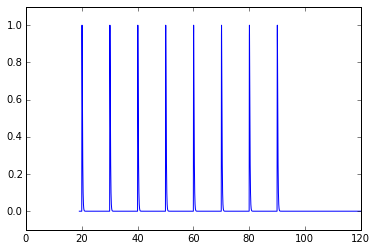

In [64]:
# Create a train of pulses
alpSum=sumAlpha(sampTimes,0.1,pulses)
print(alpSum)
gr.figure()
gr.plot(sampTimes,alpSum)
gr.ylim(-0.1,1.1)

and an interpolating function that can be used to force the U-dynamics

In [65]:
phi = lambda t,p: sc.interp(t,p["sampTimes"],sumAlpha(p["tau"],p["sampTimes"],p["pulseTimes"]))

Define the right hand side of the system and include the forcing function

In [66]:
def rhs(U,t,p):
    dU = -p['rate']*U + phi(t,p)
    return dU


Setup initial conditions and integrate the system numerically

In [58]:
U0= 1.0
p={'rate':0.5,"tau":0.1,"pulseTimes":pulseTimes,"sampTimes":sampTimes}
orbit=sc.integrate.odeint(rhs, U0, sampTimes, args=(p,), tcrit=pulseTimes).transpose()

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


[  0.00000000e+00   1.00000000e-02   2.00000000e-02 ...,   1.19970000e+02
   1.19980000e+02   1.19990000e+02]
[  1.  nan  nan ...,  nan  nan  nan]


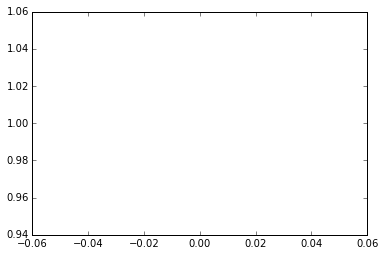

In [60]:
print(sampTimes)
print(orbit[0])
gr.figure()
gr.plot(sampTimes, orbit[0])

Numerical solution of a linear equation with pulsed forcing
Copyright (C) 2017 Marco Arieli Herrera Valdez

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License

along with this program.  If not, see <http://www.gnu.org/licenses/>.
Prof. Marco Arieli Herrera Valdez,
Departamento de Matemáticas, Oficina 232
Facultad de Ciencias, Universidad Nacional Autónoma de México
+52 55 56223899 ext 45757, +52 55 56224868 (oficina auxiliar) 
E-mail: marcoh@ciencias.unam.mx
Página institucional: fciencias.unam.mx/directorio/82718
Página personal: mahv13.wordpress.com
Research gate: www.researchgate.net/profile/Marco_Herrera-Valdez
Seminario de Biología Matemática: www.seminariobiologiamatematicaunam.wordpress.com
Twitter: @brujonildo
